### Read ridership and wx data csv

In [1]:
# Import libraries
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Merge the weather data here
rider_wx_df = pd.read_csv('../../Modeling_preprocess_clean/cleaned_data/ridership_weather.csv')
rider_wx_df.head()


,timestamp,station_complex_id,ridership,hour,day_of_week,month,is_weekend,holiday,holiday_name,ridership_lag_1,...,rolling_mean_6h,rolling_std_6h,date,NAME,TMAX,TMIN,TAVG,PRCP,AWND,SNOW
0,2022-02-01 00:00:00,1,17.0,0,1,2,0,0,No Holiday,17.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0
1,2022-02-01 01:00:00,1,5.0,1,1,2,0,0,No Holiday,17.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0
2,2022-02-01 02:00:00,1,6.0,2,1,2,0,0,No Holiday,5.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0
3,2022-02-01 03:00:00,1,12.0,3,1,2,0,0,No Holiday,6.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0
4,2022-02-01 04:00:00,1,44.0,4,1,2,0,0,No Holiday,12.0,...,37.833333,53.461824,2022-02-01,"NY CITY CENTRAL PARK, NY US",36.0,23.0,29.5,0.0,5.14,0.0


In [3]:
# timestamp to datetime
rider_wx_df['timestamp'] = pd.to_datetime(rider_wx_df['timestamp'])
rider_wx_df['date'] = rider_wx_df['timestamp'].dt.date


In [4]:
# Set the timestamp as the index
rider_wx_df.set_index('timestamp', inplace=True)


### Modeling

In [5]:
# Select the features and target
feature_cols = [
    'hour', 'day_of_week', 'month', 'is_weekend', 'holiday', 'ridership_lag_1', 
    'ridership_lag_3', 'ridership_lag_7', 'ridership_lag_24', 'rolling_mean_6h', 'rolling_std_6h',
    'TMAX', 'TMIN', 'TAVG', 'PRCP', 'AWND', 'SNOW'
]
target_col = 'ridership'

In [6]:
# Split data
train = rider_wx_df[rider_wx_df.index.year == 2022]
test = rider_wx_df[rider_wx_df.index.year == 2023]

# Check the data split
print("Train end:", train.index[-1])
print("Test start:", test.index[0])


Train end: 2022-12-31 23:00:00
Test start: 2023-02-01 00:00:00


In [7]:
# Adding the station_complex_id to the feature columns
station_ids_train = train['station_complex_id']
station_ids_test = test['station_complex_id']
X_train = train[feature_cols]
y_train = train[target_col]
X_test = test[feature_cols]
y_test = test[target_col]

In [8]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train the model
rf_model = RandomForestRegressor(random_state=42,verbose=3, n_jobs=24)
rf_model.fit(X_train_scaled, y_train)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=24)]: Done  87 out of 100 | elapsed:  6.4min remaining:   57.2s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:  6.9min finished


RandomForestRegressor(n_jobs=24, random_state=42, verbose=3)

In [10]:
y_pred_rf = rf_model.predict(X_test_scaled)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done  87 out of 100 | elapsed:   14.7s remaining:    2.1s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:   15.1s finished


In [11]:
# Print the metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae}")

# R-Squared (R2 Score)
r2 = r2_score(y_test, y_pred_rf)
print(f"R-Squared (R2 Score): {r2}")

# Symmetric Mean Absolute Percentage Error (sMAPE)
smape = 100 / len(y_test) * np.sum(2 * np.abs(y_pred_rf - y_test) / (np.abs(y_test) + np.abs(y_pred_rf)))
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {smape}%")


Mean Squared Error (MSE): 8897.262230481543
Root Mean Squared Error (RMSE): 94.32530005508355
Mean Absolute Error (MAE): 25.17831480320566
R-Squared (R2 Score): 0.9808209888663149
Symmetric Mean Absolute Percentage Error (sMAPE): 18.071874237512063%


In [ ]:
# Create the Predictions DataFrame
predictions_df = pd.DataFrame({
    'station_complex_id': station_ids_test.values,
    'hour': X_test['hour'].values,
    'month': X_test['month'].values,
    'day': test.index.day,
    'predicted_ridership': y_pred_rf,
    'actual_ridership': y_test.values
    # 'timestamp': test.index  # For time-based plotting
})

In [ ]:
# Create the Predictions DataFrame
predictions_df = pd.DataFrame({
    'station_complex_id': station_ids_test.values,
    'hour': X_test['hour'].values,
    'month': X_test['month'].values,
    'day': test.index.day,
    'predicted_ridership': y_pred_rf,
    'actual_ridership': y_test.values
})

# Metrics for each station
stations_metrics = []

for station in station_ids_test.unique():
    # Mask to select data for the current station
    station_mask = station_ids_test == station
    
    # Actual and predicted values for the station
    y_actual_station = y_test[station_mask]
    y_pred_station = y_pred_rf[station_mask]
    
    # Calculate metrics for the current station
    mse_station = mean_squared_error(y_actual_station, y_pred_station)
    rmse_station = np.sqrt(mse_station)
    mae_station = mean_absolute_error(y_actual_station, y_pred_station)
    r2_station = r2_score(y_actual_station, y_pred_station)
    smape_station = 100 / len(y_actual_station) * np.sum(2 * np.abs(y_pred_station - y_actual_station) / (np.abs(y_actual_station) + np.abs(y_pred_station)))
    
    # Append the metrics to the list
    stations_metrics.append({
        'station_complex_id': station,
        'MSE': mse_station,
        'RMSE': rmse_station,
        'MAE': mae_station,
        'R2': r2_station,
        'sMAPE': smape_station
    })

# Create a DataFrame to store station metrics
stations_metrics_df = pd.DataFrame(stations_metrics)


In [14]:
# Display the metrics and shape of the DataFrame
display(stations_metrics_df.head())
stations_metrics_df.shape

,station_complex_id,MSE,RMSE,MAE,R2,sMAPE
0,1,2014.136330,44.879130,21.276196,0.986705,14.323375
1,10,9997.319589,99.986597,53.614165,0.969169,17.120695
2,100,155.656671,12.476244,7.204251,0.953736,22.134690
3,101,1727.826161,41.567128,21.013362,0.976607,16.532696
4,118,921.940914,30.363480,16.342756,0.958356,21.816331


(361, 6)

In [15]:
# Display the predictions and shape of the DataFrame
display(predictions_df.sample(5))
display(predictions_df.shape)

,station_complex_id,hour,month,day,predicted_ridership,actual_ridership
2005371,434,3,3,30,35.42,34.0
2867418,96,18,9,26,162.32,140.0
1010778,299,18,3,4,306.12,296.0
1837552,414,16,4,20,1074.69,1200.0
1258804,33,4,2,13,42.47,42.0


(2893776, 6)

In [16]:
# Verify the data types and missing values
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893776 entries, 0 to 2893775
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   station_complex_id   int64  
 1   hour                 int64  
 2   month                int64  
 3   day                  int32  
 4   predicted_ridership  float64
 5   actual_ridership     float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 121.4 MB


In [17]:
# Export the data
predictions_df.to_csv('../../Modeling_preprocess_clean/predictions_metrics/predictions_ridership.csv', index=False)
stations_metrics_df.to_csv('../../Modeling_preprocess_clean/predictions_metrics/stations_metrics.csv', index=False)


In [18]:
# Check the data for a specific station
station_id = 612

predictions_df['station_complex_id'] = predictions_df['station_complex_id'].astype(int)

station_id = int(station_id)

station_df = predictions_df[predictions_df['station_complex_id'] == station_id]

display(station_df.sample(10))

display(predictions_df.sample(10))


,station_complex_id,hour,month,day,predicted_ridership,actual_ridership
2499533,612,5,11,1,95.34,96.0
2497039,612,7,7,20,660.95,656.0
2497836,612,12,8,22,1367.63,1275.0
2498481,612,9,9,18,0.00,0.0
2496244,612,4,6,17,41.85,33.0
2500141,612,13,11,26,887.27,859.0
2498261,612,5,9,9,56.93,50.0
2498394,612,18,9,14,5056.34,5284.0
2499346,612,10,10,24,1406.71,1416.0
2493143,612,23,2,7,241.98,220.0


,station_complex_id,hour,month,day,predicted_ridership,actual_ridership
2264183,477,23,7,3,189.93,259.0
246314,153,2,10,2,0.83,0.0
1344724,345,4,10,11,189.35,190.0
1093525,308,13,6,20,450.96,400.0
1519627,366,19,8,11,211.57,198.0
2429491,605,19,2,27,613.07,766.0
1852441,417,1,3,4,3.05,1.0
1792712,403,8,9,3,138.81,136.0
1364451,348,3,4,14,13.80,13.0
727227,255,3,9,30,15.51,13.0


In [19]:
# Drop rows with any NaN values in month, day, or hour
predictions_df.dropna(subset=['month', 'day', 'hour'], inplace=True)

# Convert month, day, and hour columns to integers to avoid error
predictions_df['month'] = predictions_df['month'].astype(int)
predictions_df['day'] = predictions_df['day'].astype(int)
predictions_df['hour'] = predictions_df['hour'].astype(int)


In [ ]:
# Check the data types
print(predictions_df.dtypes[['month', 'day', 'hour']])
print(predictions_df[['month', 'day', 'hour']].head())


month    int64
day      int64
hour     int64
dtype: object
   month  day  hour
0      2    1     0
1      2    1     1
2      2    1     2
3      2    1     3
4      2    1     4


In [ ]:
# Create a custom time representation using month, day, and hour
predictions_df['month_day_hour'] = predictions_df.apply(
    lambda row: f"{int(row['month']):02d}-{int(row['day']):02d} {int(row['hour']):02d}:00", axis=1
)


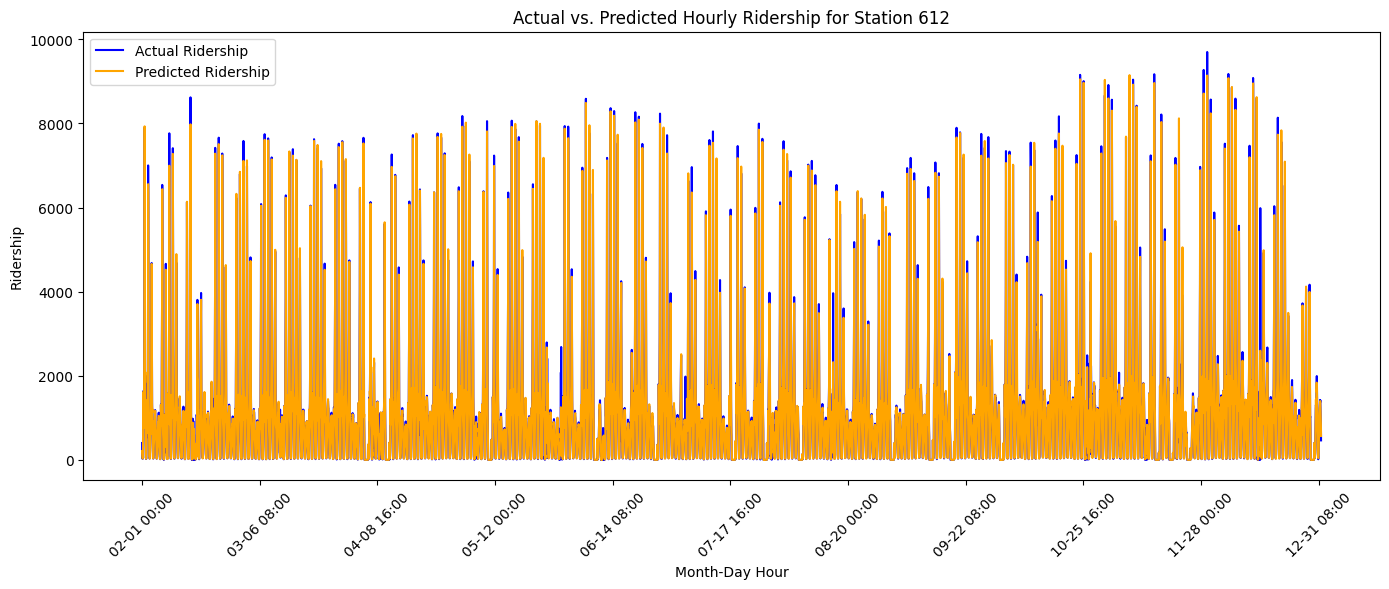

In [26]:
# Filter for the specific station ID
station_df = predictions_df[predictions_df['station_complex_id'] == station_id]

# Plot if data exists
if not station_df.empty:
    plt.figure(figsize=(14, 6))
    plt.plot(station_df['month_day_hour'], station_df['actual_ridership'], label='Actual Ridership', color='blue')
    plt.plot(station_df['month_day_hour'], station_df['predicted_ridership'], label='Predicted Ridership', color='orange')
    plt.xlabel('Month-Day Hour')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    plt.ylabel('Ridership')
    plt.title(f'Actual vs. Predicted Hourly Ridership for Station {station_id}')
    plt.legend()
    plt.tight_layout()
        # Format x-axis to show only the months
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"No data available for station ID {station_id}. Please choose a different station.")
    

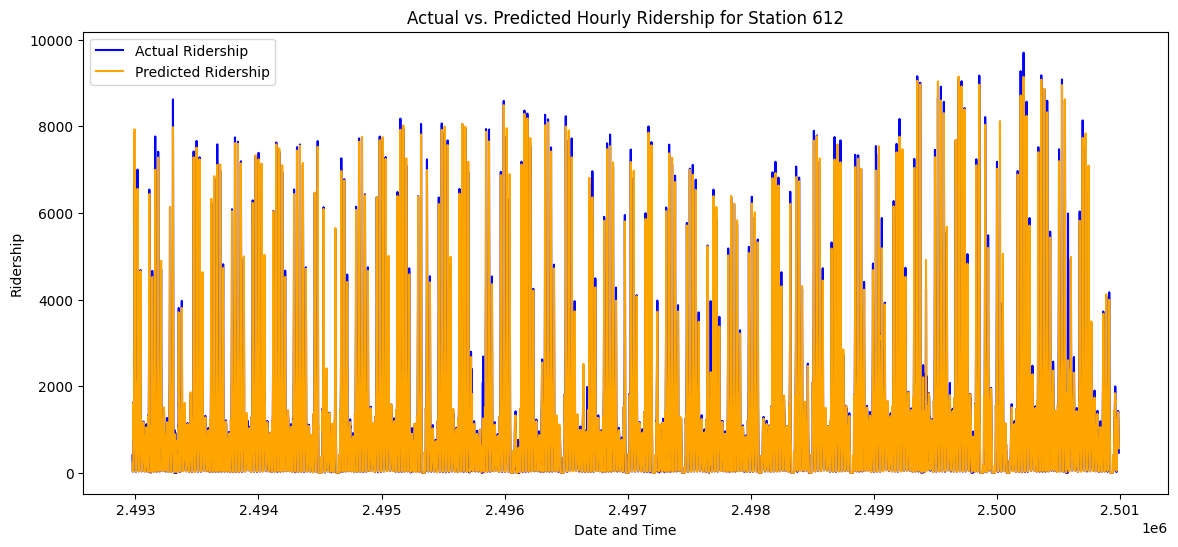

In [23]:
# Filter for the specific station ID
station_df = predictions_df[predictions_df['station_complex_id'] == station_id]

# Plot if data exists
if not station_df.empty:
    plt.figure(figsize=(14, 6))
    plt.plot(station_df.index, station_df['actual_ridership'], label='Actual Ridership', color='blue')
    plt.plot(station_df.index, station_df['predicted_ridership'], label='Predicted Ridership', color='orange')
    plt.xlabel('Date and Time')
    
    plt.ylabel('Ridership')
    plt.title(f'Actual vs. Predicted Hourly Ridership for Station {station_id}')
    plt.legend()
    plt.show()
else:
    print(f"No data available for station ID {station_id}. Please choose a different station.")



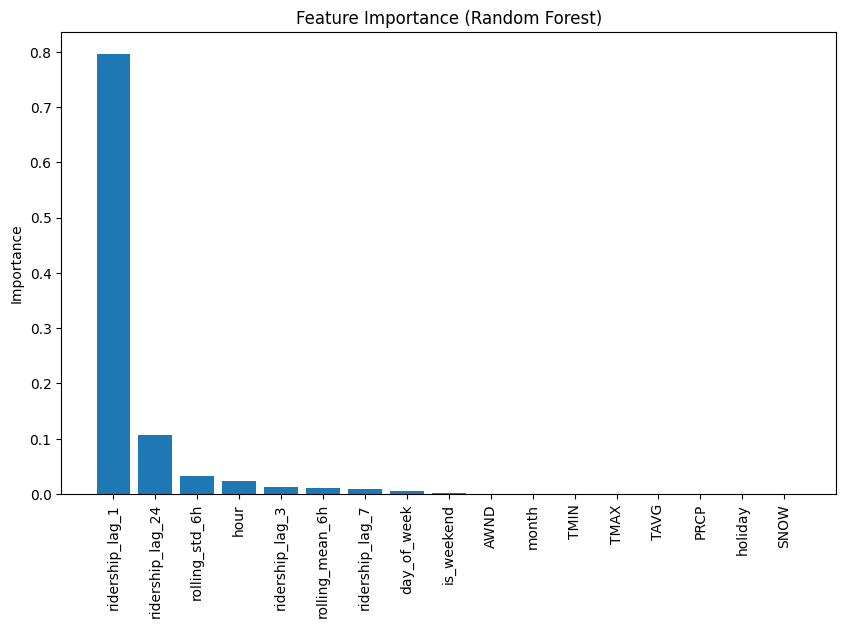

In [27]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.ylabel('Importance')
plt.show()

In [ ]:
# Calculate sMAPE
sMAPE = np.mean(2 * np.abs(predictions_df['actual_ridership'] - predictions_df['predicted_ridership']) / 
                (np.abs(predictions_df['actual_ridership']) + np.abs(predictions_df['predicted_ridership']))) * 100
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {sMAPE}%")


Symmetric Mean Absolute Percentage Error (sMAPE): 18.58812320561181%
